# **Import Library**

In [1]:
import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi

import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks

%pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

%pip install wordcloud
from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import nltk

# Mengunduh dataset untuk tokenisasi dan stopwords
nltk.download('punkt')  # Mengunduh dataset untuk tokenisasi teks
nltk.download('punkt_tab')
nltk.download('stopwords')  # Mengunduh daftar stopwords untuk bahasa Indonesia dan Inggris


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\espej\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\espej\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\espej\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **Loading Dataset**

In [3]:
import pandas as pd
# Membaca file CSV
df = pd.read_csv('ulasan_aplikasi.csv')

# Menampilkan 5 baris pertama
df.head()


,Review
0,"Gua kira main crypto tuh ribet banget cuy, kay..."
1,"bagus banget sudah saya coba, sangat suka sela..."
2,sangat membantu transaksi aset digital dan e m...
3,"Udah pakai Triv hampir setahun, dan sejauh ini..."
4,"Setelah saya coba beberapa bulan ini, masih ba..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  14876 non-null  object
dtypes: object(1)
memory usage: 116.3+ KB


In [5]:
df.isnull().sum()

Review    0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(742)

In [7]:
clean_df =df.dropna()

clean_df = clean_df.drop_duplicates()

clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14134 entries, 0 to 14874
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  14134 non-null  object
dtypes: object(1)
memory usage: 220.8+ KB


# **Preprocessing**

In [8]:
# Fungsi cleaningText untuk membersihkan teks
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text)  # remove hashtag
    text = re.sub(r'RT[\s]', '', text)  # remove RT
    text = re.sub(r"http\S+", '', text)  # remove link
    text = re.sub(r'[0-9]+', '', text)  # remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # remove special characters
    text = text.replace('\n', ' ')  # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove all punctuations
    text = text.strip(' ')  # remove characters space from both left and right text
    return text

# Fungsi casefoldingText untuk mengubah teks menjadi huruf kecil
def casefoldingText(text):
    text = text.lower()
    return text

# Fungsi tokenizingText untuk memecah teks menjadi list kata
def tokenizingText(text):
    text = word_tokenize(text)
    return text

# Fungsi filteringText untuk menghapus stopwords
def filteringText(text):
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = [txt for txt in text if txt not in listStopwords]
    return filtered

# Fungsi stemmingText untuk melakukan stemming pada kata
def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    stemmed_text = ' '.join(stemmed_words)
    return stemmed_text

# Fungsi untuk mengubah list kata menjadi kalimat
def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

In [9]:
# Dictionary kata slang dan padanannya
slangwords = {
    'gak': 'tidak',
    'nggak': 'tidak',
    'nya': 'itu',
    'yaa': 'ya',
    'sih': 'saja',
    'ku': 'saya',
    'lo': 'kamu',
    'loi': 'kamu',
    'loh': 'loh',
    'wa': 'saya',
    'g': 'tidak',
    'ga': 'tidak',
    'woy': 'hei',
    'ye': 'iya',
    'kayak': 'seperti',
    'gpp': 'tidak apa-apa',
    'bgt': 'banget',
    'biasaaja': 'biasa saja',
    'tq': 'terima kasih',
    'pls': 'mohon',
    'sm': 'sama',
    'nm': 'nama',
    'btw': 'ngomong-ngomong',
    'klo': 'kalau',
    'gaul': 'gaul',
    'cuy': 'kawan',
    'ribet': 'rumit',
    'anjir': 'anjing',
    'anjay': 'anjing',
    'parah': 'sangat',
    'gampang': 'mudah',
    'cakep': 'bagus',
    'dikit': 'sedikit',
    'udh': 'sudah',
    'ato': 'atau',
    'dr': 'dari',
    'krn': 'karena',
    'skrg': 'sekarang',
    'buat': 'untuk',
    'yg': 'yang',
    'dlu': 'dulu',
    'kyc': 'verifikasi identitas',
    'wd': 'penarikan',
    'depo': 'deposit',
    'tranding': 'trading',
    'apk': 'aplikasi',
    'trs': 'terus',
    'pdhal': 'padahal',
    'lg': 'lagi',
    'gmn': 'bagaimana',
    'ampe': 'sampai',
    'jd': 'jadi',
    'kek': 'seperti',
    'sm': 'sama',
    'dpt': 'dapat',
    'lgi': 'lagi',
    'tpi': 'tapi',
    'mnrt': 'menurut',
    'skli': 'sekali',
    'pkoknya': 'pokoknya',
    'trus': 'terus',
    'wkwk': 'tertawa',
    'wkwkwk': 'tertawa',
    'skrg': 'sekarang',
    'bs': 'bisa',
    'tp': 'tapi',
    'kalo': 'kalau',
    'gua': 'saya'
}

# Fungsi untuk memperbaiki kata slang
def fix_slangwords(text):
    words = text.split()  # Memisahkan teks menjadi kata
    fixed_words = []  # Menyimpan kata yang sudah diperbaiki

    # Mengecek setiap kata dalam teks
    for word in words:
        # Jika kata ada dalam dictionary slang, ganti dengan kata yang benar
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)  # Jika tidak ada slang, biarkan tetap

    # Gabungkan kembali kata-kata menjadi kalimat
    fixed_text = ' '.join(fixed_words)
    return fixed_text


In [10]:
clean_df

,Review
0,"Gua kira main crypto tuh ribet banget cuy, kay..."
1,"bagus banget sudah saya coba, sangat suka sela..."
2,sangat membantu transaksi aset digital dan e m...
3,"Udah pakai Triv hampir setahun, dan sejauh ini..."
4,"Setelah saya coba beberapa bulan ini, masih ba..."
...,...
14866,⭐⭐⭐⭐⭐
14867,🙄
14868,🌷
14869,👍👍👍👍👍


In [11]:
!pip install emoji

In [12]:
import emoji

def drop_emoji_rows(text):
    # Deteksi apakah ada emoji di teks
    def contains_emoji(text):
        return any(char in emoji.EMOJI_DATA for char in str(text))

    # Jika mengandung emoji, return string kosong atau NaN
    # Jika tidak, return teks asli
    if contains_emoji(text):
        return ''  # atau bisa pakai None
    else:
        return text

In [13]:
# Terapkan drop_emoji_rows pada kolom 'Review' untuk menghapus emoji
clean_df['cleaned_review'] = clean_df['Review'].apply(drop_emoji_rows)

# Hapus baris yang kolom 'cleaned_review' kosong (yang mengandung emoji)
clean_df = clean_df[clean_df['cleaned_review'] != ''].reset_index(drop=True)

# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['cleaned_review'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

print(f"Jumlah data setelah menghapus emoji: {len(clean_df)}")

Jumlah data setelah menghapus emoji: 12641


In [14]:
clean_df

,Review,cleaned_review,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,"bagus banget sudah saya coba, sangat suka sela...","bagus banget sudah saya coba, sangat suka sela...",bagus banget sudah saya coba sangat suka selam...,bagus banget sudah saya coba sangat suka selam...,bagus banget sudah saya coba sangat suka selam...,"[bagus, banget, sudah, saya, coba, sangat, suk...","[bagus, banget, coba, suka, pemakaian, gaada, ...",bagus banget coba suka pemakaian gaada kendala...
1,sangat membantu transaksi aset digital dan e m...,sangat membantu transaksi aset digital dan e m...,sangat membantu transaksi aset digital dan e m...,sangat membantu transaksi aset digital dan e m...,sangat membantu transaksi aset digital dan e m...,"[sangat, membantu, transaksi, aset, digital, d...","[membantu, transaksi, aset, digital, e, money,...",membantu transaksi aset digital e money proses...
2,"Udah pakai Triv hampir setahun, dan sejauh ini...","Udah pakai Triv hampir setahun, dan sejauh ini...",Udah pakai Triv hampir setahun dan sejauh ini ...,udah pakai triv hampir setahun dan sejauh ini ...,udah pakai triv hampir setahun dan sejauh ini ...,"[udah, pakai, triv, hampir, setahun, dan, seja...","[udah, pakai, triv, setahun, oke, transaksi, c...",udah pakai triv setahun oke transaksi cepet ta...
3,"Setelah saya coba beberapa bulan ini, masih ba...","Setelah saya coba beberapa bulan ini, masih ba...",Setelah saya coba beberapa bulan ini masih ban...,setelah saya coba beberapa bulan ini masih ban...,setelah saya coba beberapa bulan ini masih ban...,"[setelah, saya, coba, beberapa, bulan, ini, ma...","[coba, kekurangan, aplikasi, harga, jual, beli...",coba kekurangan aplikasi harga jual beli berbe...
4,"aplikasi yang sangat sangat membantu sihhhh,ap...","aplikasi yang sangat sangat membantu sihhhh,ap...",aplikasi yang sangat sangat membantu sihhhhapa...,aplikasi yang sangat sangat membantu sihhhhapa...,aplikasi yang sangat sangat membantu sihhhhapa...,"[aplikasi, yang, sangat, sangat, membantu, sih...","[aplikasi, membantu, sihhhhapa, pemula, masuk,...",aplikasi membantu sihhhhapa pemula masuk dunia...
...,...,...,...,...,...,...,...,...
12636,Aku kaya,Aku kaya,Aku kaya,aku kaya,aku kaya,"[aku, kaya]",[kaya],kaya
12637,Nice great,Nice great,Nice great,nice great,nice great,"[nice, great]","[nice, great]",nice great
12638,ACl Gamestip,ACl Gamestip,ACl Gamestip,acl gamestip,acl gamestip,"[acl, gamestip]","[acl, gamestip]",acl gamestip
12639,Ok.,Ok.,Ok,ok,ok,[ok],[ok],ok


Pelabelan

In [15]:
import csv
import requests
from io import StringIO

# Load lexicon positif dan negatif saja
lexicon_positive = dict()
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])

# Fungsi analisis (netral = skor 0)
def sentiment_analysis_lexicon_indonesia(text):
    score = 0

    # Cek apakah input berupa list atau string
    if isinstance(text, list):
        words = text  # Sudah berupa list
    else:
        words = text.split()  # Jika string, split dulu

    for word in words:
        if word in lexicon_positive:
            score += lexicon_positive[word]
        elif word in lexicon_negative:
            score += lexicon_negative[word]

    if score > 0:
        polarity = 'positive'
    elif score < 0:
        polarity = 'negative'
    else:
        polarity = 'neutral'

    return score, polarity

In [16]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
positive    8249
negative    2998
neutral     1394
Name: count, dtype: int64


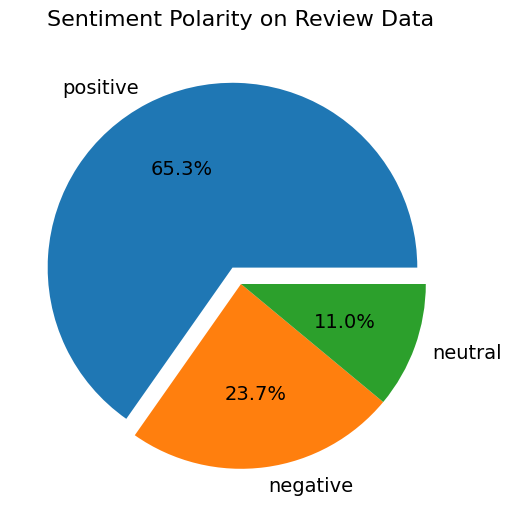

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))

sizes = [count for count in clean_df['polarity'].value_counts()]
labels = list(clean_df['polarity'].value_counts().index)

# Explode otomatis sesuai jumlah kategori
explode = [0.1] + [0] * (len(labels) - 1)

ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity on Review Data', fontsize=16, pad=20)

plt.show()

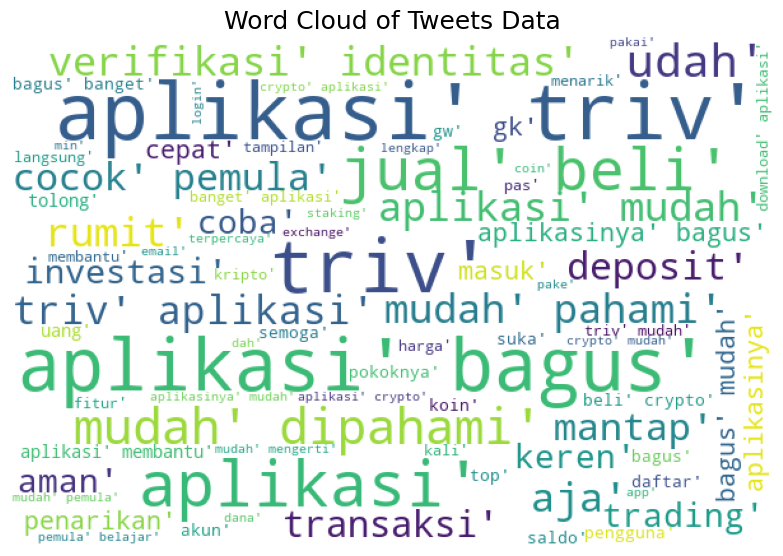

In [18]:
# === POSITIVE TWEETS ===
pd.set_option('display.max_colwidth', 3000)
positive_tweets = clean_df[clean_df['polarity'] == 'positive']
positive_tweets = positive_tweets[['text_akhir', 'polarity_score', 'polarity', 'text_stopword']]
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)
positive_tweets = positive_tweets.reset_index(drop=True)
positive_tweets.index += 1

# === NEGATIVE TWEETS ===
negative_tweets = clean_df[clean_df['polarity'] == 'negative']
negative_tweets = negative_tweets[['text_akhir', 'polarity_score', 'polarity', 'text_stopword']]
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=True)
negative_tweets = negative_tweets.head(10)  # ← DIPERBAIKI
negative_tweets = negative_tweets.reset_index(drop=True)
negative_tweets.index += 1

# === WORD CLOUD ===
# Gabungkan semua teks (asumsikan text_stopword berisi string)
list_words = ' '.join(clean_df['text_stopword'].astype(str))

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow(wordcloud)
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

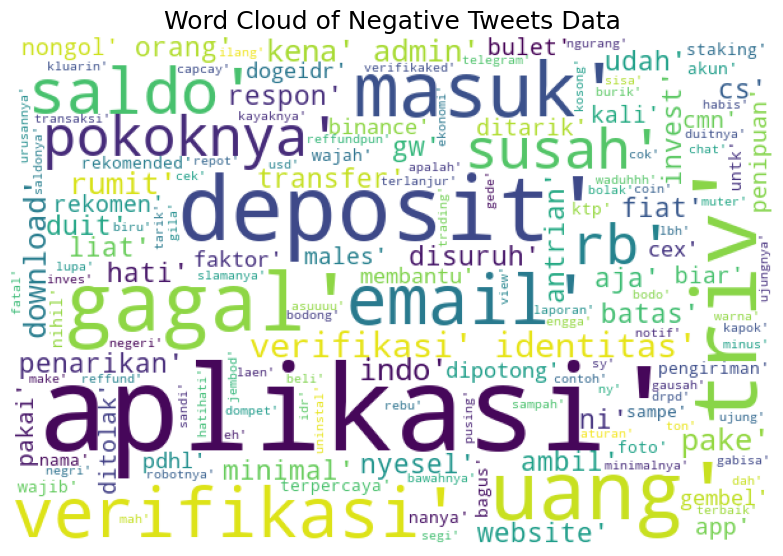

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gabungkan semua teks dari negative_tweets
list_words = ' '.join(negative_tweets['text_stopword'].astype(str))

# Buat WordCloud
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Negative Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow(wordcloud)
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

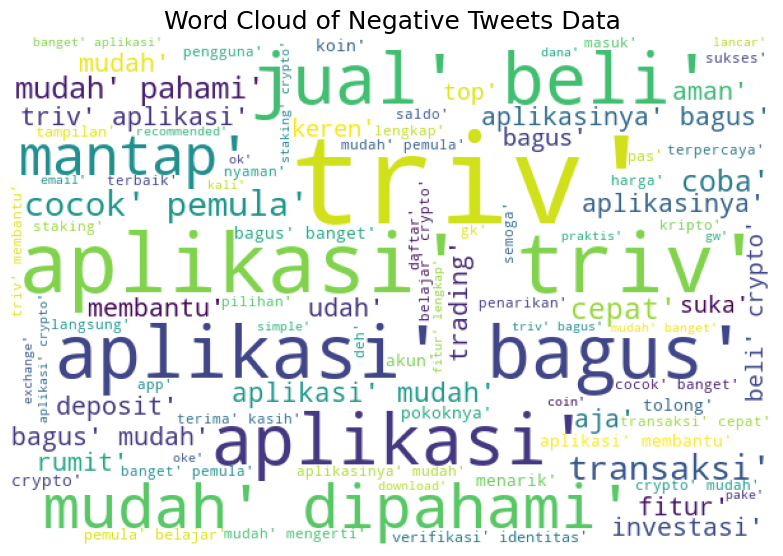

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gabungkan semua teks dari positive_tweets
list_words = ' '.join(positive_tweets['text_stopword'].astype(str))

# Buat WordCloud
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Negative Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow(wordcloud)
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

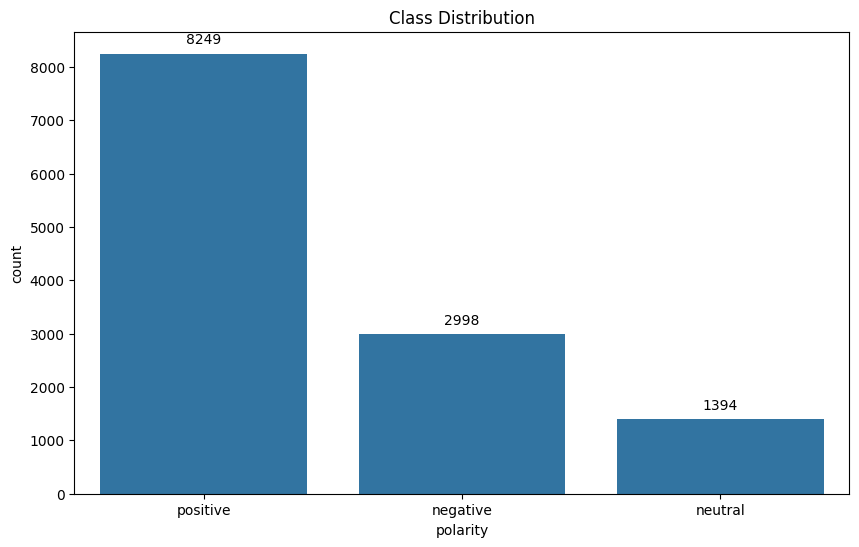

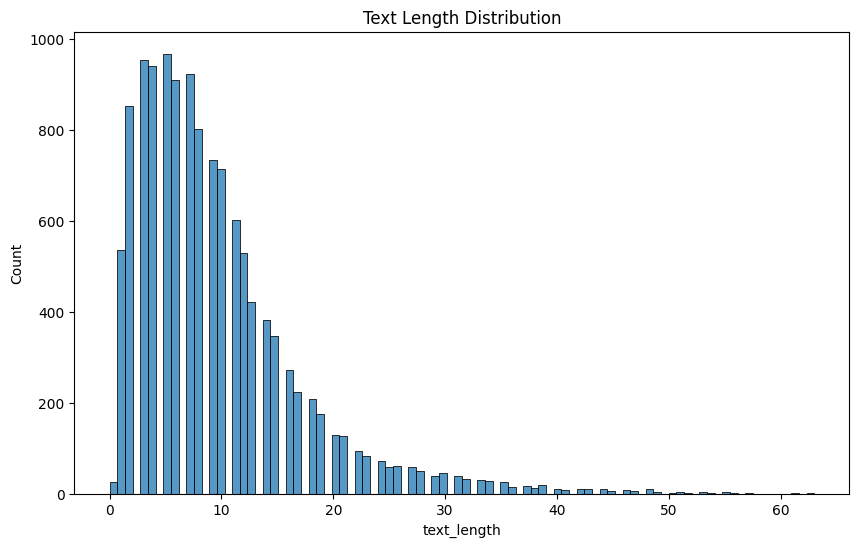

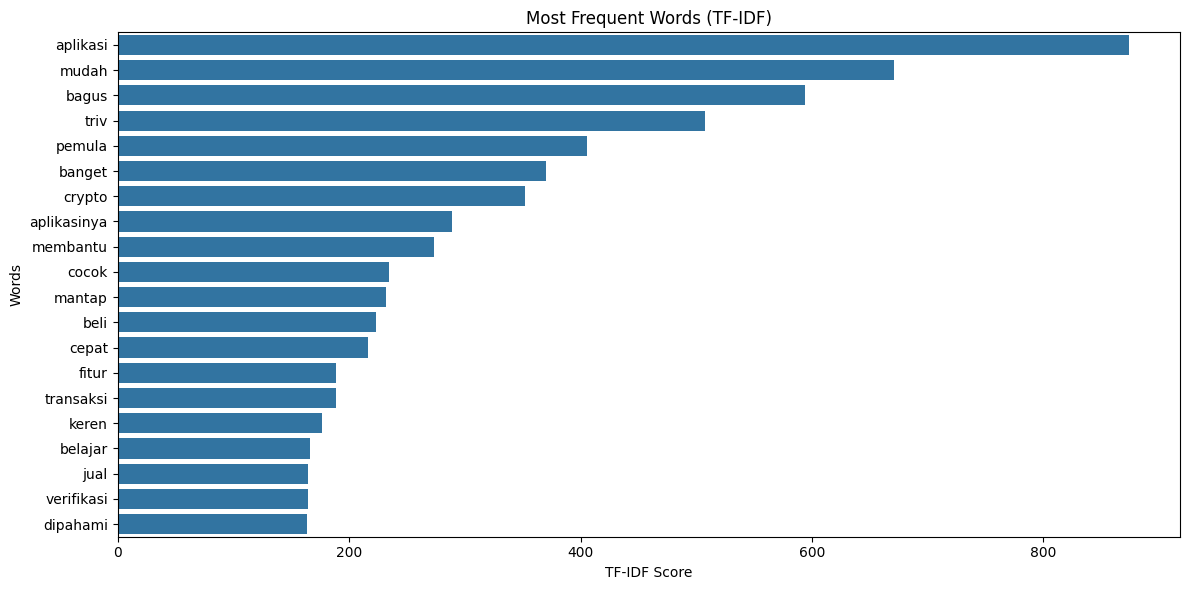

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# === 1. CLASS DISTRIBUTION ===
plt.figure(figsize=(10, 6))
class_dist_plot = sns.countplot(x='polarity', data=clean_df)
plt.title('Class Distribution')

for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')
plt.show()

# === 2. TEXT LENGTH DISTRIBUTION ===
plt.figure(figsize=(10, 6))
clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(clean_df['text_length'])
plt.title('Text Length Distribution')
plt.show()

# === 3. MOST FREQUENT WORDS (TF-IDF) ===
plt.figure(figsize=(12, 6))

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_df['text_akhir'])

# Cara cepat: hitung sum langsung dari sparse matrix
tfidf_sum = np.array(X.sum(axis=0)).flatten()

# Ambil feature names (kompatibel dengan semua versi scikit-learn)
try:
    feature_names = vectorizer.get_feature_names_out()
except AttributeError:
    feature_names = vectorizer.get_feature_names()

# Buat DataFrame
tfidf_df = pd.DataFrame({
    'word': feature_names,
    'jumlah': tfidf_sum
}).sort_values('jumlah', ascending=False).head(20)

# Plot
sns.barplot(x='jumlah', y='word', data=tfidf_df)
plt.title('Most Frequent Words (TF-IDF)')
plt.xlabel('TF-IDF Score')
plt.ylabel('Words')
plt.tight_layout()
plt.show()

# **Modeling**

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

fitur_teks = clean_df['text_akhir'].astype(str)
label_sentimen = clean_df['polarity'].replace({'neutral': 0, 'negative': 1, 'positive': 2})
vektor_tfidf = TfidfVectorizer(max_features=20000, ngram_range=(1, 2), max_df=0.9)

fitur_tfidf = vektor_tfidf.fit_transform(fitur_teks)

C:\Users\espej\AppData\Local\Temp\ipykernel_7260\3005717274.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  label_sentimen = clean_df['polarity'].replace({'neutral': 0, 'negative': 1, 'positive': 2})


**Pelatihan: RF,**    **Ekstraksi Fitur: TF-IDF,**    **Pembagian Data: 70/30**

In [23]:
# ...existing code...
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# jangan kirim class_weight ke train_test_split (tidak dikenali)
X_train, X_test, y_train, y_test = train_test_split(
    fitur_tfidf,
    label_sentimen,
    test_size=0.3,
    stratify=label_sentimen,
    random_state=42,
)

# set class_weight di classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)
rf_model.fit(X_train, y_train)

y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

acc_train_rf = accuracy_score(y_train, y_pred_train_rf)
acc_test_rf = accuracy_score(y_test, y_pred_test_rf)

f1_rf = f1_score(y_test, y_pred_test_rf, average='macro')

print(f"Akurasi Training Set (Random Forest): {acc_train_rf:.2%}")
print(f"Akurasi Testing Set (Random Forest): {acc_test_rf:.2%}")
print("\nClassification Report (Random Forest - Testing Set):")
print(classification_report(y_test, y_pred_test_rf))


Akurasi Training Set (Random Forest): 99.95%
Akurasi Testing Set (Random Forest): 82.05%

Classification Report (Random Forest - Testing Set):
              precision    recall  f1-score   support

           0       0.70      0.61      0.65       418
           1       0.83      0.58      0.68       900
           2       0.83      0.95      0.89      2475

    accuracy                           0.82      3793
   macro avg       0.79      0.71      0.74      3793
weighted avg       0.82      0.82      0.81      3793



**Pelatihan: SVM,**    **Ekstraksi Fitur: TF-IDF,**    **Pembagian Data: 80/20**

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Pembagian data 80/20
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(
    fitur_tfidf,
    label_sentimen,
    test_size=0.2,
    random_state=42,
    stratify=label_sentimen # Tetapkan stratify untuk menjaga proporsi kelas
)

# Inisialisasi dan latih model SVM
svm_model = SVC(kernel='linear', random_state=42) # Menggunakan kernel linear sebagai contoh
svm_model.fit(X_train_svm, y_train_svm)

# Prediksi pada data training dan testing
y_pred_train_svm = svm_model.predict(X_train_svm)
y_pred_test_svm = svm_model.predict(X_test_svm)

# Evaluasi model
acc_train_svm = accuracy_score(y_train_svm, y_pred_train_svm)
acc_test_svm = accuracy_score(y_test_svm, y_pred_test_svm)

f1_svm = f1_score(y_test_svm, y_pred_test_svm, average='macro')


print(f"Akurasi Training Set (SVM): {acc_train_svm:.2%}")
print(f"Akurasi Testing Set (SVM): {acc_test_svm:.2%}")
print("\nClassification Report (SVM - Testing Set):")
print(classification_report(y_test_svm, y_pred_test_svm))

Akurasi Training Set (SVM): 96.67%
Akurasi Testing Set (SVM): 86.91%

Classification Report (SVM - Testing Set):
              precision    recall  f1-score   support

           0       0.77      0.53      0.63       279
           1       0.86      0.77      0.81       600
           2       0.88      0.96      0.92      1650

    accuracy                           0.87      2529
   macro avg       0.84      0.75      0.79      2529
weighted avg       0.86      0.87      0.86      2529



LSTM

In [25]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, accuracy_score, f1_score

le = LabelEncoder()
y = le.fit_transform(label_sentimen)

tokenizer = Tokenizer(num_words=20000, oov_token="")
tokenizer.fit_on_texts(fitur_teks)

sequences = tokenizer.texts_to_sequences(fitur_teks)
padded_sequences = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

X_train, X_test, y_train, y_test_lstm = train_test_split(
    padded_sequences, y, test_size=0.2, stratify=y, random_state=42
)

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

model = Sequential()
model.add(Embedding(input_dim=20000, output_dim=128))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=1e-3), metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=15,
    batch_size=64,
    class_weight=class_weight_dict,
    callbacks=[early_stop],
    verbose=1
)

y_pred_train_probs = model.predict(X_train)
y_pred_test_probs = model.predict(X_test)

y_pred_train = np.argmax(y_pred_train_probs, axis=1)
y_pred_test_lstm = np.argmax(y_pred_test_probs, axis=1)

acc_train = accuracy_score(y_train, y_pred_train)
acc_test_lstm = accuracy_score(y_test_lstm, y_pred_test_lstm)

f1_lstm = f1_score(y_test_lstm, y_pred_test_lstm, average='macro')

print("Akurasi Model pada Testing Set (BiLSTM):", acc_test_lstm)
print("\nClassification Report (BiLSTM - Testing Set):\n", classification_report(y_test_lstm, y_pred_test_lstm))

print(f"Akurasi Training Set (BiLSTM): {acc_train:.2%}")
print(f"Akurasi Testing Set (BiLSTM): {acc_test_lstm:.2%}")


Epoch 1/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 25s 132ms/step - accuracy: 0.6540 - loss: 0.8160 - val_accuracy: 0.7431 - val_loss: 0.6752
Epoch 2/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 19s 132ms/step - accuracy: 0.8827 - loss: 0.3834 - val_accuracy: 0.8468 - val_loss: 0.4013
Epoch 3/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 19s 133ms/step - accuracy: 0.9376 - loss: 0.2129 - val_accuracy: 0.8449 - val_loss: 0.4047
Epoch 4/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 18s 126ms/step - accuracy: 0.9598 - loss: 0.1368 - val_accuracy: 0.8458 - val_loss: 0.4389
Epoch 5/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 21s 145ms/step - accuracy: 0.9649 - loss: 0.1102 - val_accuracy: 0.8291 - val_loss: 0.5197
316/316 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step
Akurasi Model pada Testing Set (BiLSTM): 0.8616053776196125

Classification Report (BiLSTM - Testing Set):
               precision    recall  f1-score   support

           0       0.53      0.76      0.63       279
           1       0.86      0.80      0.83   

Perbandingan 3 model

In [26]:
import pandas as pd

# Membuat DataFrame untuk hasil akurasi model yang sudah Anda train
results_df = pd.DataFrame({
    'Model': ['Random Forest', 'SVM', 'BiLSTM'],
    'Accuracy Train': [
        acc_train_rf,
        acc_train_svm,
        acc_train
    ],
    'Accuracy Test': [
        acc_test_rf,
        acc_test_svm,
        acc_test_lstm
    ]
})

print(results_df)

           Model  Accuracy Train  Accuracy Test
0  Random Forest        0.999548       0.820459
1            SVM        0.966673       0.869118
2         BiLSTM        0.940170       0.861605


inference

In [28]:
# Contoh paragraf yang ingin diuji
paragraf = [
    "Aplikasi ini sangat membantu dan mudah digunakan, saya puas dengan layanannya.",
    "proses verifikasi sangat lama dan saldo saya tidak masuk.",
    "Proses pendaftaran berjalan sesuai instruksi.",
    "Aplikasi tidak ada manfaat"
]

# Preprocessing sesuai pipeline sebelumnya
def preprocess_text(text):
    text = cleaningText(text)
    text = casefoldingText(text)
    text = fix_slangwords(text)
    tokens = tokenizingText(text)
    tokens = filteringText(tokens)
    text = toSentence(tokens)
    return text

# Preprocessing semua paragraf
paragraf_bersih = [preprocess_text(p) for p in paragraf]

# Ekstraksi fitur TF-IDF
paragraf_tfidf = vektor_tfidf.transform(paragraf_bersih)

# Prediksi dengan Random Forest
pred_rf = rf_model.predict(paragraf_tfidf)
# Prediksi dengan SVM
pred_svm = svm_model.predict(paragraf_tfidf)
# Prediksi dengan BiLSTM (perlu tokenizing dan padding, bukan tfidf)
paragraf_seq = tokenizer.texts_to_sequences(paragraf_bersih)
paragraf_pad = pad_sequences(paragraf_seq, maxlen=100, padding='post', truncating='post')
pred_lstm = model.predict(paragraf_pad)
pred_lstm = np.argmax(pred_lstm, axis=1)

# Mapping label angka ke string
label_map = {0: 'neutral', 1: 'negative', 2: 'positive'}

# Tampilkan hasil
for i, p in enumerate(paragraf):
    print(f"Paragraf: {p}")
    print(f"Random Forest: {label_map[pred_rf[i]]}")
    print(f"SVM         : {label_map[pred_svm[i]]}")
    print(f"BiLSTM      : {label_map[pred_lstm[i]]}")
    print("-" * 50)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Paragraf: Aplikasi ini sangat membantu dan mudah digunakan, saya puas dengan layanannya.
Random Forest: positive
SVM         : positive
BiLSTM      : positive
--------------------------------------------------
Paragraf: proses verifikasi sangat lama dan saldo saya tidak masuk.
Random Forest: negative
SVM         : negative
BiLSTM      : negative
--------------------------------------------------
Paragraf: Proses pendaftaran berjalan sesuai instruksi.
Random Forest: positive
SVM         : positive
BiLSTM      : positive
--------------------------------------------------
Paragraf: Aplikasi tidak ada manfaat
Random Forest: negative
SVM         : negative
BiLSTM      : negative
--------------------------------------------------
